# Challenge BigMart Sales

## Introducción

### El problema 
Se proporciona un dataset con datos transaccionales referidos a ventas de distintos productos. El objetivo es construir un modelo de regresión simple para predecir las ventas por producto de una tienda en particular, que forma parte de una cadena de tiendas, y descubrir cuáles son los principales factores que influencian dicha predicción. 

### Hipotesis

1. La categoría del producto podría tener cierto impacto en las ventas: productos de consumo general se venden más que bebidas alcohólicas. 
2. El tipo de tienda y su ubicación es importante para las ventas.
3. El tamaño de la tienda puede ser importante (¿la gente va a las tiendas grandes para comprar todo lo que necesita de una sola vez y conseguir mejores precios, o prefiere visitar tiendas pequeñas?) 

### Los datos 

Se proveen dos archivos train y test con la misma estructura:
* Item_Identifier: nombre o identificador del producto
* Item_Weight: peso del producto en gramos
* Item_Fat_Content: clasificación del producto en términos de grasas contenidas en él.
* Item_Visibility: scoring de visibilidad del producto: medida que hace referencia al conocimiento del producto en el consumidor. ¿Qué tan fácil puede ser encontrado el producto?
* Item_Type: tipo de producto
* Item_MRP: máximum retailed price. Precio calculado por el fabricante que indica el precio más alto que se puede cobrar por el producto.
* Outlet_Identifier: identificador de la tienda
* Outlet_Establishment_Year: año de lanzamiento de la tienda
* Outlet_Size: tamaño de la tienda
* Outlet_Location_Type: clasificación de las tiendas según ubicación
* Outlet_Type: tipo de tienda 
* Item_Outlet_Sales: ventas del producto en cada observacion 

## EDA Analisis Exploratorio de los Datos

### Enfoque para resolucion teniendo en cuenta las HIPOTESIS

Despues de analizar las hipotesis y la descripcion de las variables, hago una suposicion de cuales variables tendran mayor impacto en cada hipotesis para enfocarme en ellas al momento de realizar el EDA.

| VARIABLE |SE RELACIONA O NO CON LA HIPOTESIS  |
| ------------- | -----:|
| Item_Identifier| NO|
| Item_Weight| NO|
| Item_Fat_Content| POSIBLE CON 1°|
| Item_Visibility| POSIBLE CON 2°|
| Item_Type| POSIBLE CON 1°|
| Item_MRP| NO|
| Outlet_Identifier| NO|
| Outlet_Establishment_Year| NO|
| Outlet_Size| POSIBLE CON 3°|
| Outlet_Location_Type| POSIBLE CON 2°|
| Outlet_Type| POSIBLE CON 2°|
| Item_Outlet_Sales| TARGET|



### Importo Librerias necesarias para EDA

In [1]:
#!pip install pandas_profiling en caso de no tenerla instalada

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

### Primer Vistazo a los Datos
Cargo ambos archivos CSV tanto de Train como para Test.

In [3]:
# reading train and test data
train_data = pd.read_csv('data/Train_BigMart.csv')
test_data = pd.read_csv('data/Test_BigMart.csv')

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Con este primer vistazo a los datos, mi suposicion es que las variables que van a tener mayor impacto en las ventas seran 
**Item_Visibility , Item_Type , OutletSize , Outlet_Location_Type , Outlet_Type.**

Siendo nuestra variable de salida o analisis final el **Item_Outlet_Sales**

Si ponemos atencion a la variable **Item_Identifier** podemos encontrar una relacion con el grupo de palabras y el **Item_Type** con la siguiente regla ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable).

Otra observacion es que algunos productos tenian Item_Visibility igual a "0". Lo cual sera tenido en cuenta para el resto del analisis ya que no tiene sentido que su visibilidad sea igual a "0"

### Analisis Avanzado de los Datos

In [5]:

pandas_profiling.ProfileReport(train_data)

In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Primera Conclusión
La primera conclusion despues de realizar el EDA, es que poseemos un dataset de 8523 observaciones, en la cual la mayoria de las variables no poseen valores nulos.

Sin embargo las variables **Item_Weight** y **Outlet_Size** presentan algunos casos de observaciones con valores nulos.

Ademas, poseemos 12 variables en total de las cuales 5 son numericas y 7 categoricas.

Si observamos el **Item_Identifier** podemos ver que tenemos un numero total de 1562 productos distintos.Se presencian duplicados, ya que un producto puede existir en varias tiendas, o que no todas las tiendas tienen todos los tipos de productos. 

#### Item_Outlet_Sales Distribucion
Analizando el historgrama de nuestra variable target vemos que declina hacia la derecha a mayores ventas, con mayor concentracion en ventas mas bajas

![Item_Outlet_Sales Distribucion](Graficos\1.JPG)

#### Correlacion entre las 5 variables numericas y la variable objetivo/target
Analizando las variables 5 numéricas, podemos observar que Item_Visibility es la variable con la correlación más baja con nuestra variable objetivo.

Esto afecta a nuestra suposicion inicial de que esta variable tuviera relacion con la hipotesis 2°: "El tipo de tienda y su ubicación es importante para las ventas", y que tuviera un alto impacto en la variable objetivo. Sin embargo, dado que este no es un comportamiento esperado, debemos investigar. 

Además, esta característica tiene una correlación nula con las otras variables.

Además, la correlación más positiva pertenece a Item_MRP.

![Correlacion entre las 5 variables numericas y la variable objetivo/target](Graficos\2.JPG)

#### Item_Fat_Content distribucion

Para Item_Fat_Content hay dos opciones posibles: "Low Fat" o "Regular". Sin embargo, en nuestros datos tenemos estos dos tipos de Fat escritos de diferentes maneras. Esto debe ser corregido en el **Data Pre-Procesamiento**.


![Item_Fat_Content distribucion](Graficos\3.JPG)

#### Item_Type distribucion

Esta varibale posee 16 tipos de productos. Es la variable categorica con mayor cantidad de categorias.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

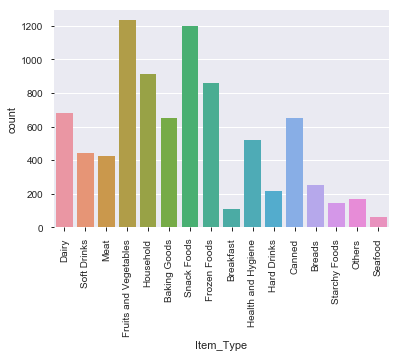

In [7]:
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

#### Outlet_Size distribucion


Parece que hay un número bajo de tiendas con un tamaño igual a "High". La mayoría de las tiendas existentes parecen ser "Small" o "Medium". Será interesante ver cómo esta variable se relaciona con nuestro objetivo. Si las tiendas de tamaño "High" tienen mejores resultados como se esperaba inicialmente o debido a este número, los resultados de ventas de distribución podrían ser similares. Esto se relaciona con la hipotesis 3°

![Outlet_Size distribucion](Graficos\4.JPG)

#### Outlet_Location_Type distribucion


Tenemos mas presencia de tiendas Tier 1 y Tier 2 juntas, que de Tier 3. Suponiendo que Tier 1 es small, Tier 2 Medium y Tier 3 High, pero esto es solo una suposicion ya que no hay documentacion de los datos que lo valide

![Outlet_Location_Type distribucion](Graficos\5.JPG)

#### Outlet_Type distribucion

Parece que Supermarket Type2, Grocery Store y Supermarket Type3 tienen una bajo peso en esta distribución. Tal vez podamos crear una sola categoría con los tres. Sin embargo, antes de hacer esto, debemos ver su impacto en Item_Outlet_Sales.

![Outlet_Type distribucion](Graficos\6.JPG)

#### Analisis Item_Weight X Item_Outlet_Sales 

Vimos anteriormente que Item_Weight tenía una baja correlación con nuestra variable objetivo. Si trazamos ambas características podemos ver esa relación.

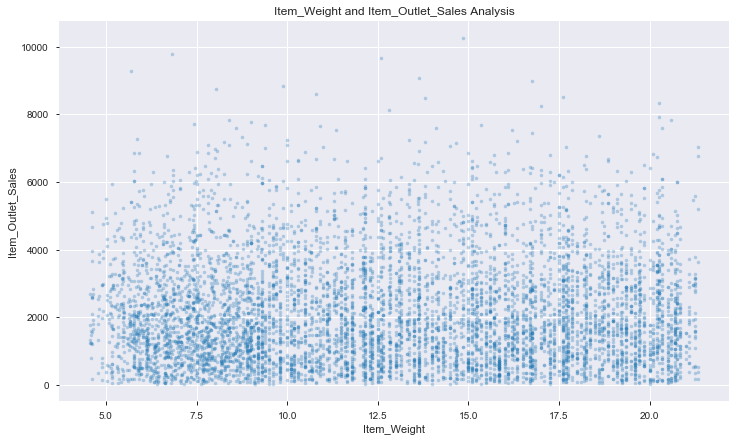

In [8]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Weight, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)

#### Analisis Item_Visibility X Item_Outlet_Sales

Cpmo vimos en la correlación y ahora este gráfico de trama, indican que cuanto más Item_Visibility tenga un Item, menores serán sus ventas. Esto podría deberse al hecho de que una gran cantidad de productos de uso diario, que no necesitan una gran visibilidad, controlan la parte superior de la tabla de ventas. Como podemos ver en grafico a continuación, la mayoría de los productos vendidos tienen menor visibilidad. Además, hay un número preocupante de productos con visibilidad cero.

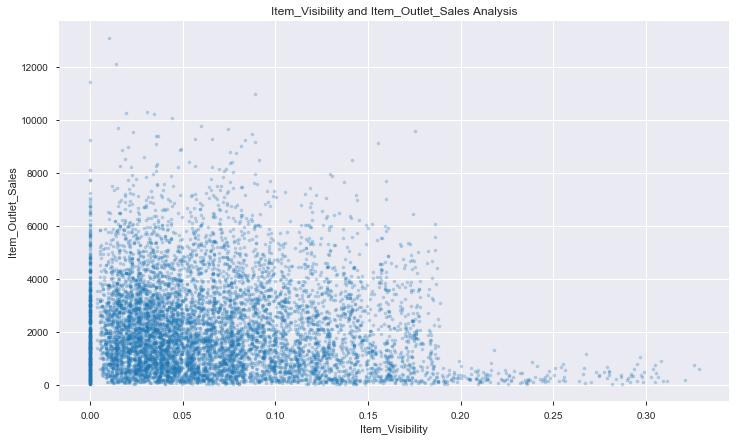

In [9]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Visibility, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)

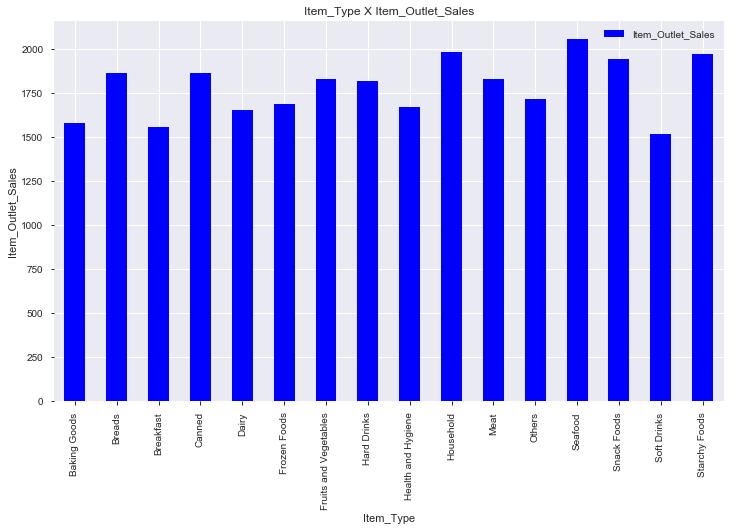

In [10]:
Item_Type_pivot = \
train_data.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Type X Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

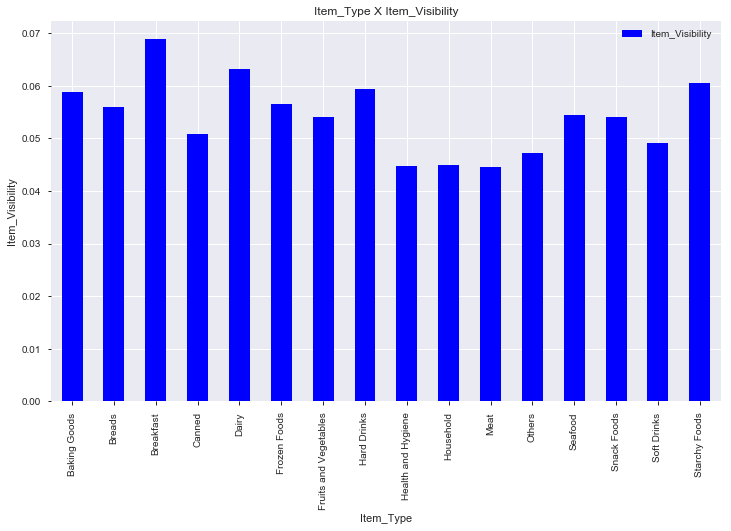

In [11]:
Item_Type_pivot = \
train_data.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.median)
Item_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Visibility")
plt.title("Item_Type X Item_Visibility")
plt.xticks(rotation=90)
plt.show()

#### Outlet_Establishment_Year X Item_Outlet_Sales

Parece que no hay una gran relacion entre el Outlet_Establishment_Year de la tienda y Item_Outlet_Sales de los artículos. 1998 tiene valores bajos, pero podría deberse al hecho de que las pocas tiendas abrieron en ese año

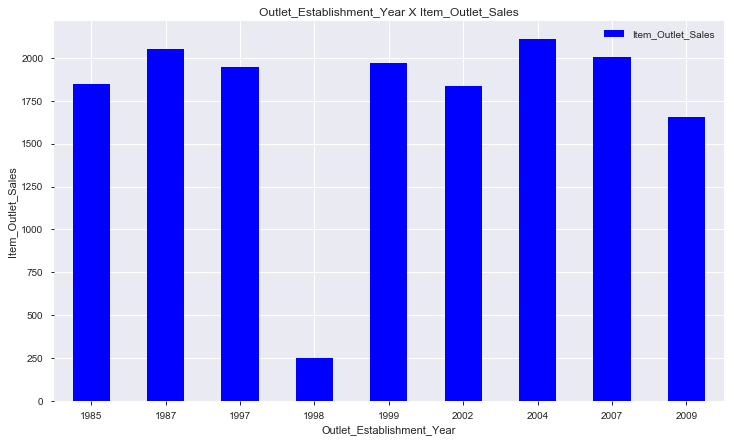

In [12]:
Outlet_Establishment_Year_pivot = \
train_data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Establishment_Year X Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### Item_Fat_Content X Item_Outlet_Sales

Como ya mencionamos hay un error de nomeclatura que sera corregido en el Data Preprocesamiento. Pero mas a lla de eso, podemos notar que los productos "Low Fat" tienen mayores ventas que los "Regular".

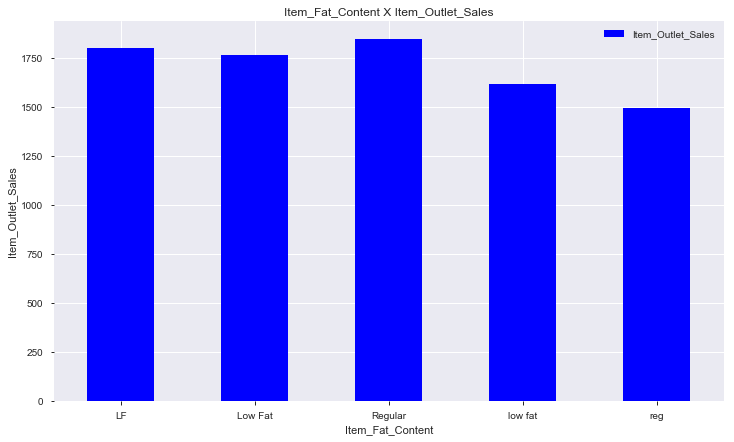

In [13]:
Item_Fat_Content_pivot = \
train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Fat_Content X Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### Outlet_Identifier X Item_Outlet_Sales

De las diez tiendas, dos son Groceries, mientras que seis son Supermarket Type1, un Supermarket Type2 y un Supermarket Type3. 
Vemos que los Groceries ("OUT010", "OUT019") tienen los resultados de ventas más bajos que se esperan, seguidos por el Supermarket Type2 ("OUT018"). Curiosamente, la mayoría de las tiendas son de tipo Supermarket Type1 de tamaño "High" y no tienen los mejores resultados. Los mejores resultados pertenecen a "Out027", que es un Supermarket Type3 de tamaño "Medium".



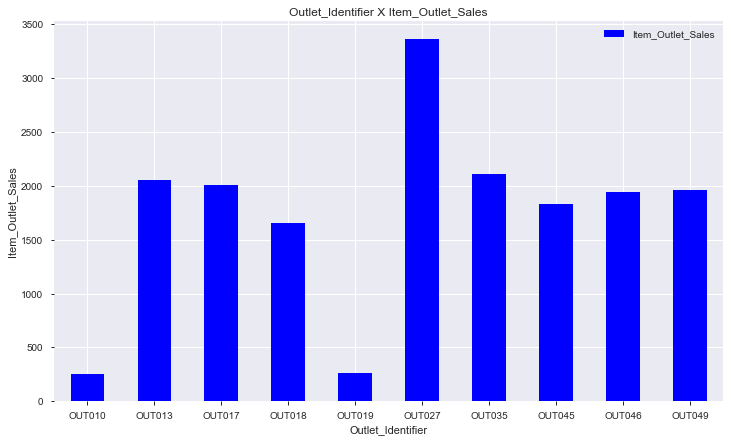

In [14]:
Outlet_Identifier_pivot = \
train_data.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Identifier X Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [15]:
train_data.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [16]:
train_data.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


#### Outlet_Size X Item_Outlet_Sales

Suponiamos que las tiendas de gran tamaño deberían tener mayores ventas, ya que la gente va a las tiendas grandes para comprar todo lo que necesita de una sola vez. Según los resultados, este es casi el caso. Curiosamente, los consumidores tienden a preferir las tiendas medianas en lugar de las grandes. Como vimos en la sección anterior, la mayoría de las tiendas tienen el tamaño "Medium", pero aún así las tiendas "High" y "Small" que están claramente en un número inferior pueden superar o incluso acercarse a sus números.

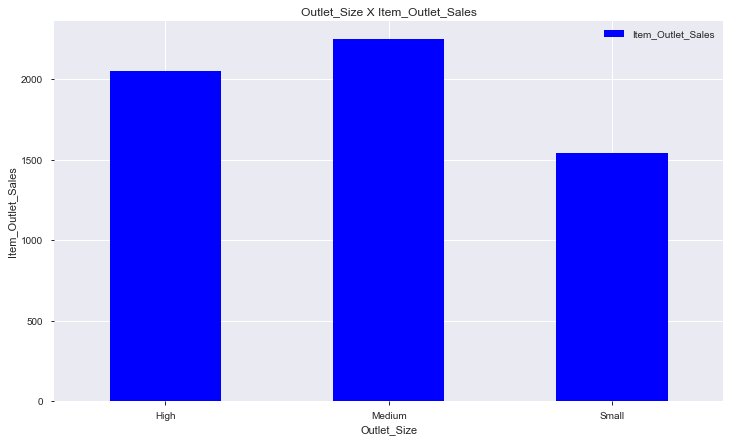

In [17]:
Outlet_Size_pivot = \
train_data.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Size X Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

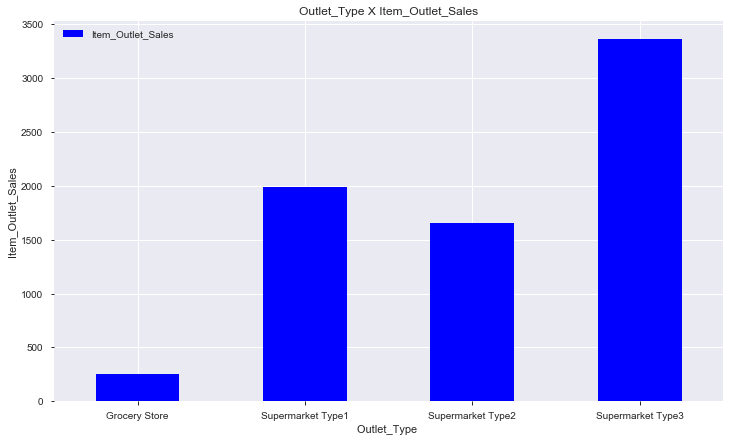

In [18]:
Outlet_Type_pivot = \
train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Type X Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### Outlet_Location_Type X Item_Outlet_Sales

Podemos observar que las tiendas Tier 2 tienen mejores ventas que las Tier 3 y las Tier 1

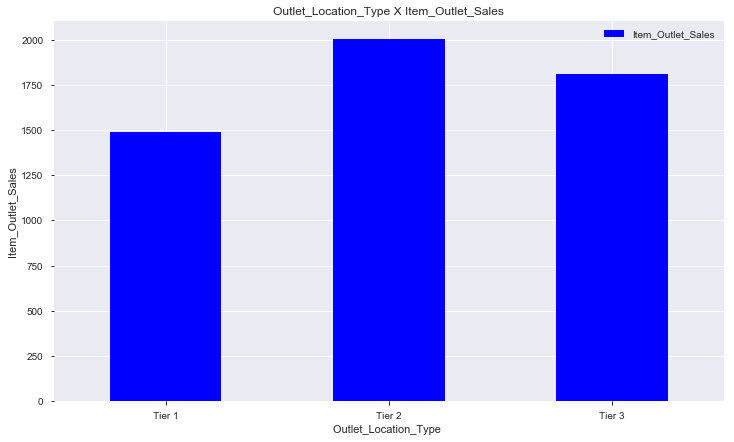

In [19]:
Outlet_Location_Type_pivot = \
train_data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Location_Type X Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [20]:
train_data.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


#### Item_Type_Combined X Item_Outlet_Sales

Tomamos un ultimo enfoque, utilizando la variable Item_Identifier podemos encontrar una relacion con el grupo de palabras y el Item_Type con la siguiente regla ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable). Creamos una nueva variable tomar tomar esos datos y su relacion con la variable obajetivo.

Los resultados muestran que los item Non-Consumable tienen mayores ventas que el resto, pero siendo esta diferencia no muy grande.

In [21]:

train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])
train_data['Item_Type_Combined'] = train_data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

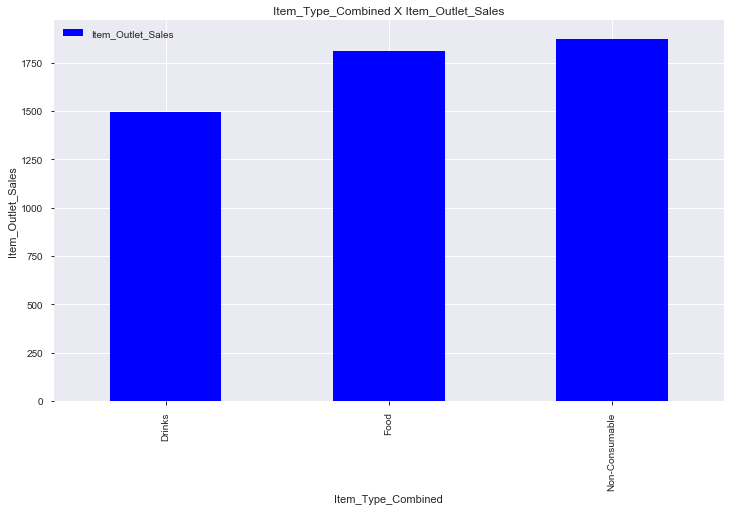

In [22]:
Item_Type_Combined_pivot = \
train_data.pivot_table(index='Item_Type_Combined', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_Combined_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type_Combined")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Type_Combined X Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

In [23]:
train_data=train_data.drop(['Item_Type_Combined'], axis=1)

### Conclusion Final EDA

Teniendo en cuenta los insights que pudimos encontrar en los datos y las hipotesis

1. La categoría del producto podría tener cierto impacto en las ventas: productos de consumo general se venden más que bebidas alcohólicas. 

**Pudimos observar que no hay gran impacto entre el Item_Type y las ventas, como asi tampoco una gran diferencia despues de utilizar el codigo de 2 letras.**

2. El tipo de tienda y su ubicación es importante para las ventas.

**El Supermarket Type3 con tamaño Medium y en Tier 2, poseen las mejores ventas**

**De localizacion el Tier 2, seguido por el Tier 3 tienen las mejores ventas. Y los Supermarket Type 3 seguido por el Type 1 tienen las mejores ventas.**


3. El tamaño de la tienda puede ser importante (¿la gente va a las tiendas grandes para comprar todo lo que necesita de una sola vez y conseguir mejores precios, o prefiere visitar tiendas pequeñas?) 

**Los consumidores tienden a preferir las tiendas medianas en lugar de las grandes.**


## Data Preprocesamiento

Corrijo los errores presentes en la variable Item_Fat_Content para solo tener dos valores posibles, tanto en Train como en Test data

In [24]:
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

Anexo los dos dataset Train y Test para poder realizar un preprocesamiento de los datos

In [25]:
full_data = [train_data, test_data]

Reemplazo valores nulos en Item_Weight por el mean, y Outlet_Size por el valor medium

In [26]:
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)

## Feature Engineering

Selecciono las variables categoricas para poder realizar un dummie de los datos y permitir su utilizacion en el modelo

In [27]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [28]:
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)

## Modelo ML

### Librerias

Importo librerias necesarias en Modelado

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

### Funciones

In [30]:
#Funcion para entrenar el modelo ML y hacer un Grid Search para encontrar los mejores parametros para obtener la mejor precision
def GridSearch(x_train= None,y_train=None): 
    
    #Declaro Parametros
    params = {'learning_rate':[0.1, 0.01, 0.001],'n_estimators': [100, 250,500],'max_depth': [3,5],'min_samples_split':[100,200]}
 
    #Declaro Modelo
    gb = GradientBoostingRegressor()
    
    #Inicio un grid search con el modelo definido para encontrar los mejores parametros para el modelo
    grid_search = GridSearchCV(gb,params, scoring='r2')
    grid_search.fit(x_train, y_train)
    
    #Guardo los scores para graficar
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']

    #Imprimo los resultados
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        if params==grid_search.best_params_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
    
    #Configuro los mejores parametros
    rf = grid_search.best_estimator_
    return rf

In [31]:
#Funcion para graficar el accuracy
def RegScorePlot(model,x_train= None,y_train=None, x_test=None,y_test=None): 
    from sklearn.metrics import r2_score
    from scipy.stats import spearmanr, pearsonr
    
    #obtener la prediccion del modelo para Test y Train, y obtener el scoring de los mismos
    predicted_test = model.predict(x_test)
    test_score = r2_score(y_test, predicted_test)
    spearmanTest = spearmanr(y_test, predicted_test)
    pearsonTest = pearsonr(y_test, predicted_test)
    
    #Obtener Train scoring
    predicted_train = model.predict(x_train)
    train_score = r2_score(y_train, predicted_train)
    spearmanTrain = spearmanr(y_train, predicted_train)
    pearsonTrain = pearsonr(y_train, predicted_train)
    
    #Imprimir resultados
    print("Train data R-2 score: {}".format(train_score))
    
    print('Train data Spearman correlation: {}'.format(spearmanTrain[0]))
    print('Train data Pearson correlation: {}'.format(pearsonTrain[0]))
    print(' ')
    print('Test data R-2 score: {}'.format(test_score))
    print('Test data Spearman correlation: {}'.format(spearmanTest[0]))
    print('Test data Pearson correlation: {}'.format(pearsonTest[0]))
    
    #Crear Dataframe para GRaficar
    RFperf = pd.DataFrame()
    RFperf['Score'] = [round(train_score,3),round(test_score,3),
                           spearmanTrain[0],spearmanTest[0],
                          pearsonTrain[0],pearsonTest[0]]
    RFperf['Step'] = ['train','test','train','test','train','test']
    RFperf['metric'] = ['r2','r2','Spearman','Spearman','Pearson',"Pearson"]

    #Imprimir Resultados
    sns.pointplot(y=RFperf['Score'],x=RFperf['Step'],hue=RFperf['metric'])
    plt.ylim([-.1,1])
    plt.title('Model Scores')
    plt.show()
    
    return RFperf

### Modelo

Selecciono las variables que tienen mayor importancia en el modelo, que seran verificadas a continuacion.

In [32]:
feat_cols = ['Item_Weight', 'Item_Visibility','Outlet_Establishment_Year', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

Separo las variables de entrenamiento de la variable objetivo del modelo, y despues separo el conjunto de datos en X_train, X_test, y_train, y_test, siendo 80% entrenamiento 20% testeo

In [33]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

El modelo de ML que voy a utilizar en esta ocasion es el GradientBoostingRegressor. Es una modelo para problemas de regresión y clasificación(en este caso utilizamos el regresor), que produce un modelo de predicción en forma de un conjunto de modelos de predicción débiles, típicamente árboles de decisión . Se construye el modelo de una manera por etapas.
En cada etapa se ajusta un árbol de regresión en el gradiente negativo de la función de pérdida dada. En otras palabras cada etapa aprende del error de la anterior para mejorar la precision.

La eleccion de este modelo, es debido a su buena performance en mi experiencia personal en casos de regresiones previos. Ademas de ser uno de los mejores modelos en las Kaggle Competitions en casos de regresiones.

In [35]:
rf = GridSearch(x_train=X_train,y_train=y_train)

0.596 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 200, 'n_estimators': 250}


La medida que utilize para este modelo es el R2, ya que es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para regresión múltiple.

La definición de R cuadrado es bastante sencilla; Es el porcentaje de la variación de la variable de respuesta que se explica por un modelo lineal.Esta es la metrica principal para medir la precision del modelo.

tambien agregue la metrica de Pearson y Spearman, en caso de querer ver la correlacion entre las variables, si se ve afectada en los datos de Train y Test. La correlación de Pearson funciona bien solo con las relaciones lineales, mientras que la correlación de Spearman funciona bien incluso con las relaciones no lineales, por eso elegi las dos.



Train data R-2 score: 0.6198056748816716
Train data Spearman correlation: 0.824978812947748
Train data Pearson correlation: 0.7913913284475812
 
Test data R-2 score: 0.5896476195792704
Test data Spearman correlation: 0.8046313371908843
Test data Pearson correlation: 0.7702237567471667


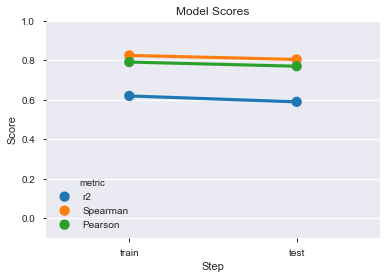

In [36]:
RfPerf = RegScorePlot(rf,x_test=X_test,x_train=X_train,y_test=y_test,y_train=y_train)

En el siguiente tabla podemos visualizar las variables con mayor importancia en el modelo.

In [37]:
fI = pd.DataFrame()
fI['Variable'] = X_train.columns
fI['Importancia'] = rf.feature_importances_
fI.sort_values(by='Importancia',ascending=False)[0:10]

,Variable,Importancia
3,Item_MRP,0.547036
26,Outlet_Type_Supermarket Type3,0.174009
24,Outlet_Type_Supermarket Type1,0.162718
2,Outlet_Establishment_Year,0.053083
25,Outlet_Type_Supermarket Type2,0.049958
1,Item_Visibility,0.005274
0,Item_Weight,0.004137
19,Item_Type_Starchy Foods,0.001460
10,Item_Type_Fruits and Vegetables,0.000790
6,Item_Type_Breakfast,0.000516


Por ultimo, la aplicacion del modelo entrenado a el test dataset

In [38]:
X_t = test_datar[feat_cols]
y_result = rf.predict(X_t)

In [39]:
y_result

array([1631.7150981 , 1469.06916048,  679.45503557, ..., 1924.09078437,
       3690.13172522, 1408.95242252])

In [40]:
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()

In [41]:
result.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1631.715098
1,FDW14,OUT017,1469.069160
2,NCN55,OUT010,679.455036
3,FDQ58,OUT017,2353.157131
4,FDY38,OUT027,5919.649867
5,FDH56,OUT046,1922.577411
6,FDL48,OUT018,707.518553
7,FDC48,OUT027,2228.912973
8,FDN33,OUT045,1617.440606
9,FDA36,OUT017,2966.215019


## Otros enfoques para poder mejorar el modelo

* Podria combinar los tipos de supermarket, capaz en type 2 y 3 no son tan diferentes entre si.

* Cambiar el valor de Item_Visibility por otro que no sea 0, un mean podria ser un buen valor.

* Analizar en mayor profundidad el Outlet_Establishment_Year, y la trayectoria o crecimiento de las tiendas a lo largo del tiempo

* Utilizar en el modelo una normalizacion de los Item_Type, ya que 16 categorias pueden llegar a ser demasiadas

* Utilizar un pipeline con diferentes modelos de regresion con hiperparametros para poder compararlos mismos(esto no se realizo , teniendo en cuenta que los tiempo de procesamiento iban a ser muy altos)